In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.drop('instant',axis='columns', inplace=True)
bike.drop('dteday',axis='columns', inplace=True)
bike.drop('casual',axis='columns', inplace=True)
bike.drop('registered',axis='columns', inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike.shape

(730, 12)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Important points:
year: mean is 0.5 which means 50 percent data is of 2018 and rest is of 2019
holiday: 2.8 percent of days are holidays 

## Step 2: Data Preparation
- We have changed season,mnth,weathersit and weekday

In [9]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
def pairplot(x):
    sns.pairplot(data = bike, x_vars =x,y_vars='cnt',size=4, aspect=1)

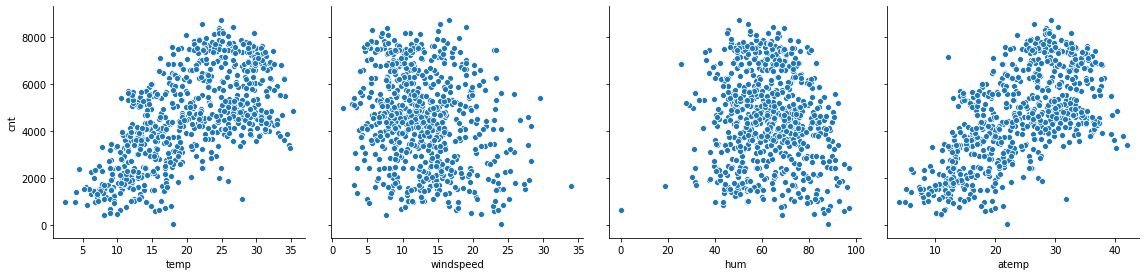

In [11]:
a = ['temp','windspeed','hum','atemp']
pairplot(a)

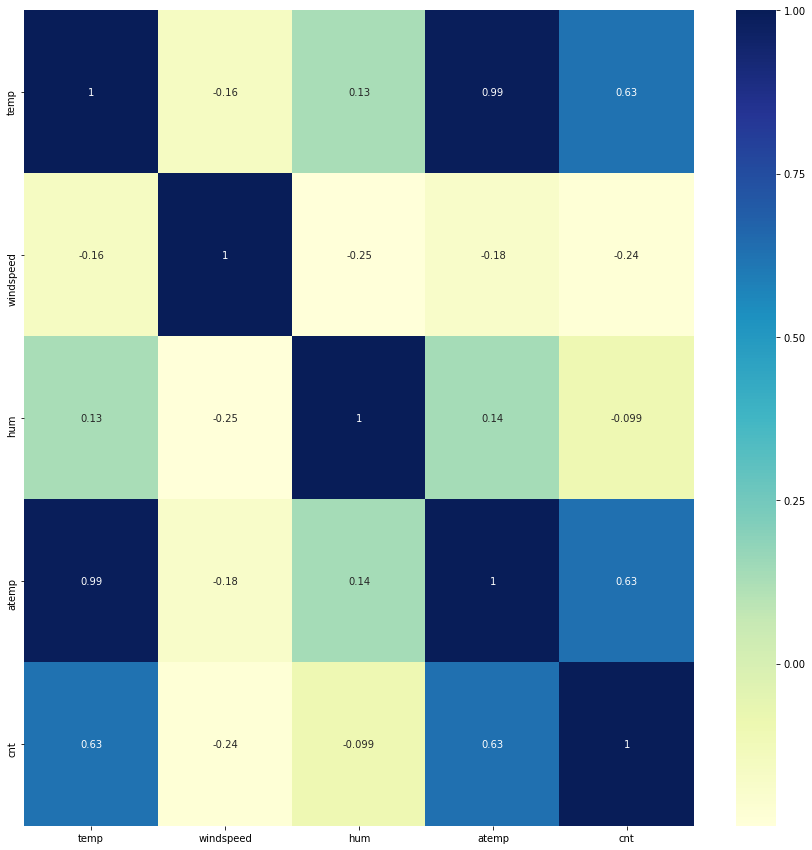

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(bike[a+['cnt']].corr(),cmap="YlGnBu", annot = True)

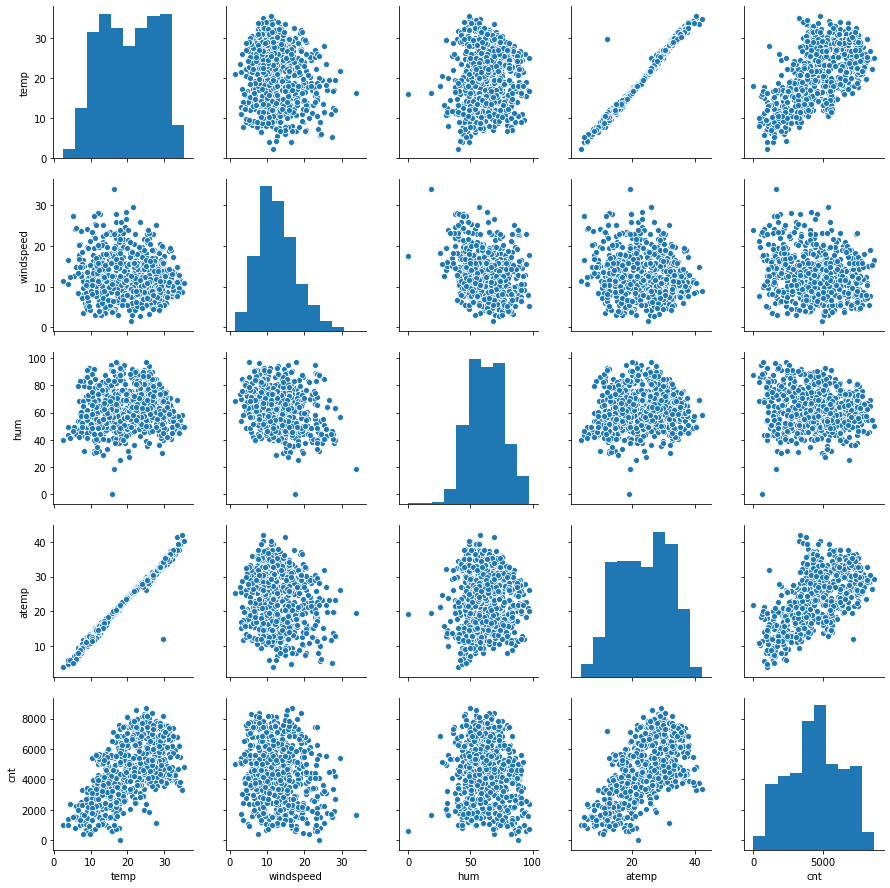

In [13]:
sns.pairplot(bike[['temp','windspeed','hum','atemp','cnt']])

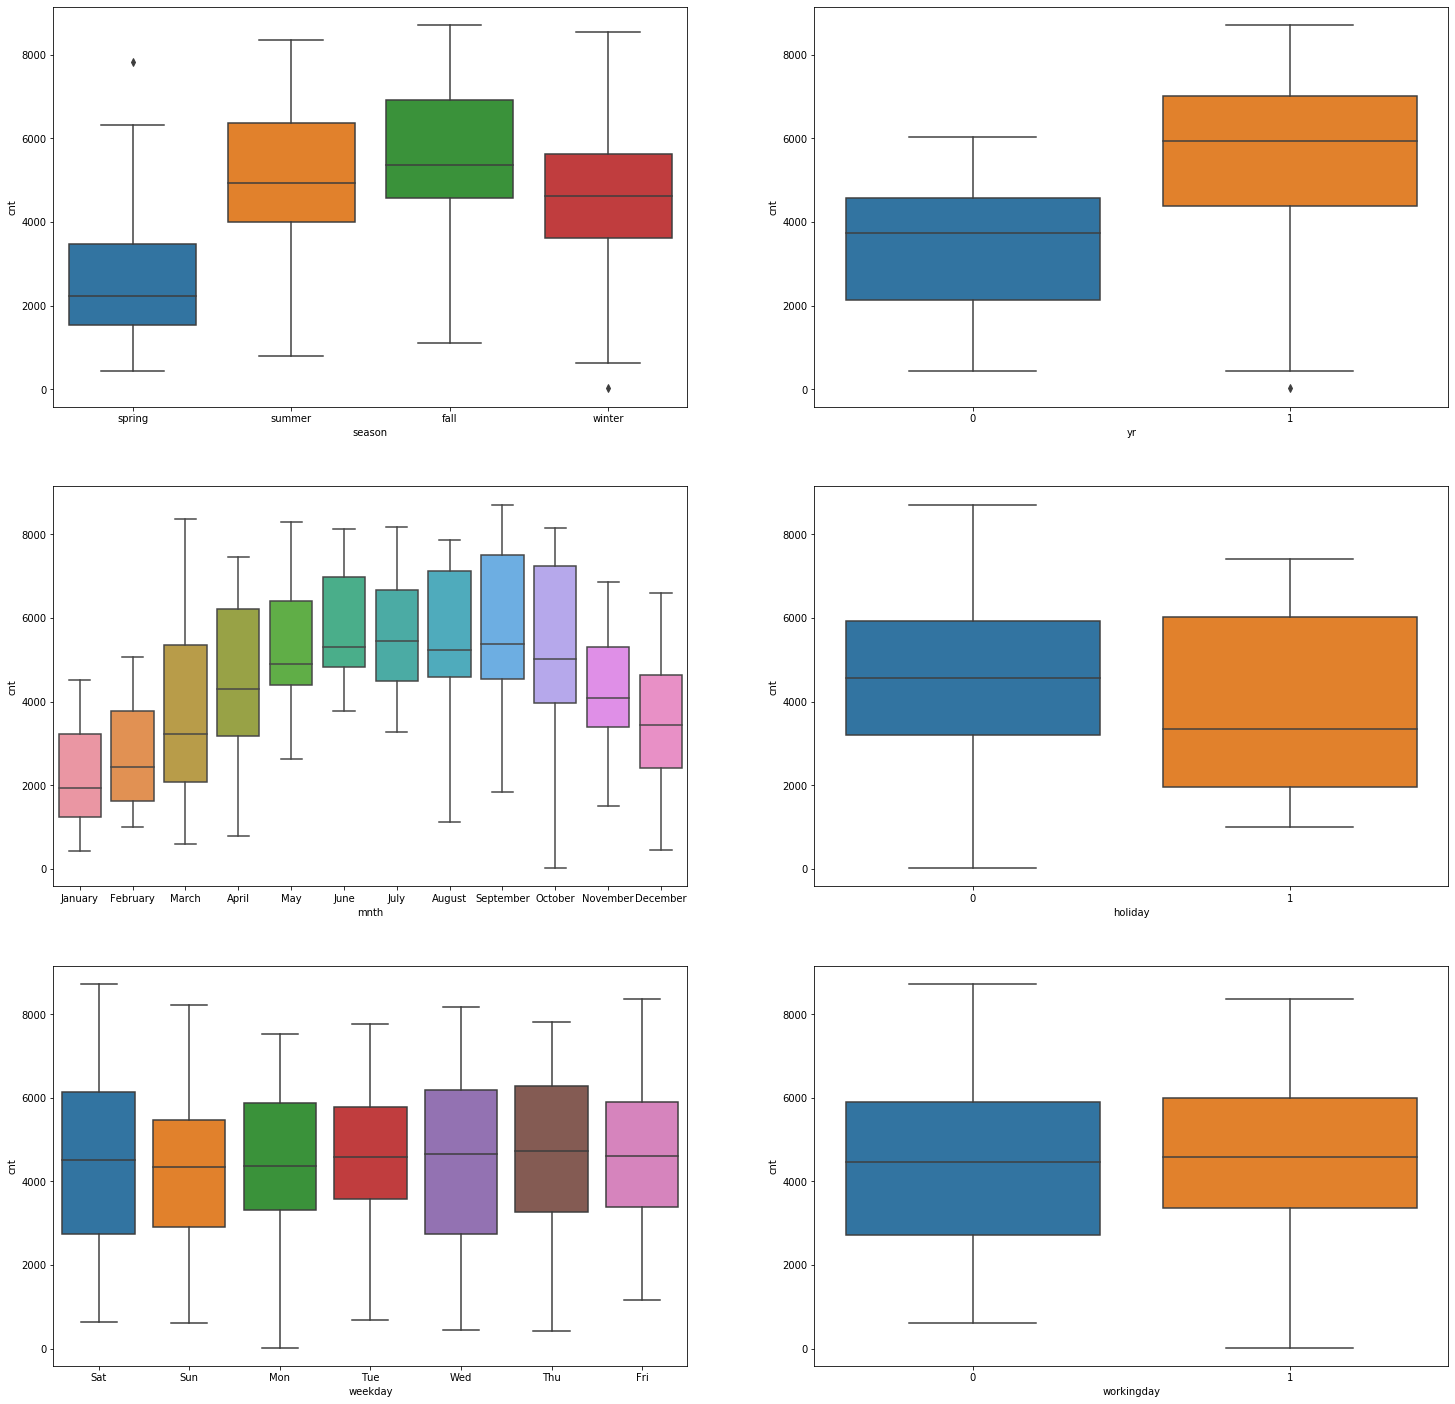

In [14]:
plt.figure(figsize =(25,25))
plt.subplot(3,2,1) # no of Rows, no of Columns, number
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

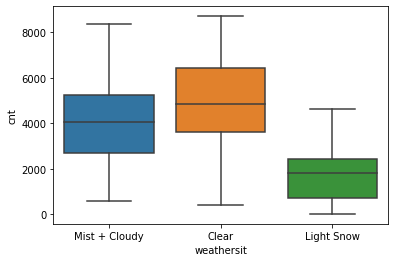

In [15]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

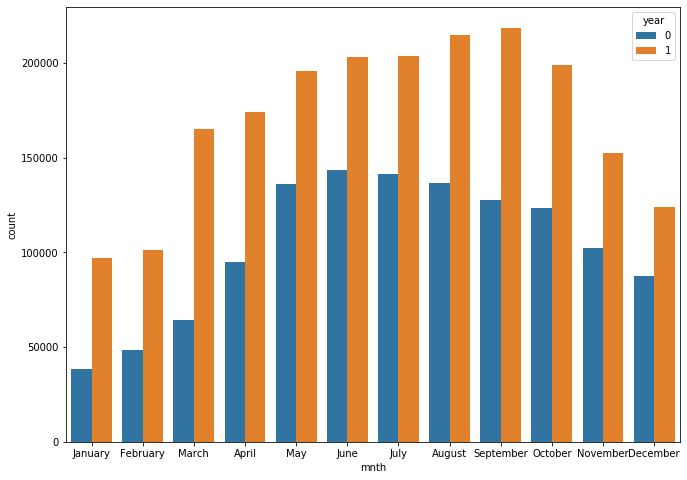

In [16]:
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table = pd.pivot_table(bike,index=['mnth'],columns=['yr'],values='cnt',aggfunc='sum').reset_index()
table.index = pd.CategoricalIndex(table['mnth'],categories=sort_order,ordered=True)
table = table.sort_index().reset_index(drop=True)
table_melted = pd.melt(table, id_vars='mnth',var_name="year", value_name="count")
table_melted
plt.figure(figsize =(11,8))
sns.barplot(x='mnth', y="count", hue="year",\
                data=table_melted)


In [17]:
def plot(x):
    table = pd.pivot_table(bike,index=[x],columns=['yr'],values='cnt',aggfunc='sum').reset_index()
    table_melted = pd.melt(table, id_vars=x,var_name="year", value_name="count")
    table['Total']= table[0]+table[1]
    table['Perct Inc']= ((table[0]-table[1])*100)/table[0]
    print(table)
    sns.barplot(x=x, y="count", hue="year",
                    data=table_melted)
    

yr     weathersit       0        1    Total  Perct Inc
0           Clear  835067  1422885  2257952 -70.391717
1      Light Snow   25112    12757    37869  49.199586
2   Mist + Cloudy  382924   612100   995024 -59.848952


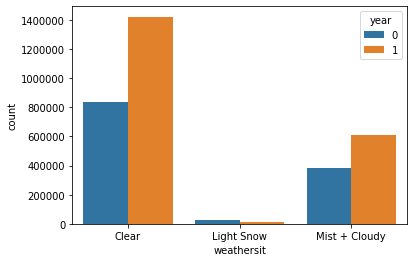

In [18]:
plot('weathersit')

yr  season       0       1    Total   Perct Inc
0     fall  419650  641479  1061129  -52.860479
1   spring  150000  319514   469514 -113.009333
2   summer  347316  571273   918589  -64.482201
3   winter  326137  515476   841613  -58.055050


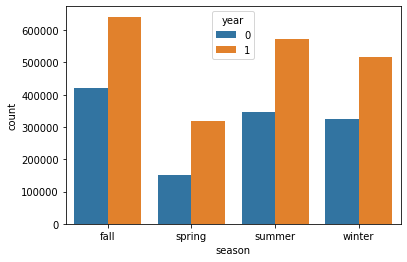

In [19]:
plot('season')

yr  holiday        0        1    Total  Perct Inc
0         0  1213081  1999329  3212410 -64.814139
1         1    30022    48413    78435 -61.258410


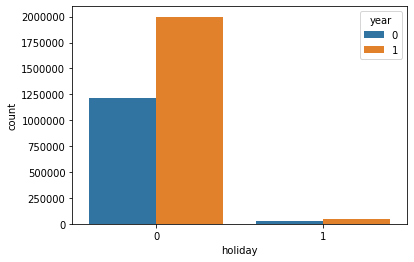

In [20]:
plot('holiday')

yr  workingday       0        1    Total  Perct Inc
0            0  386839   613430  1000269 -58.575014
1            1  856264  1434312  2290576 -67.508152


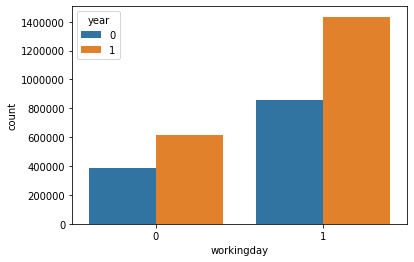

In [21]:
plot('workingday')

yr weekday       0       1   Total  Perct Inc
0      Fri  182006  305784  487790 -68.007648
1      Mon  180221  275282  455503 -52.746905
2      Sat  179743  298064  477807 -65.827876
3      Sun  177074  266953  444027 -50.757875
4      Thu  174552  310843  485395 -78.080457
5      Tue  180338  288771  469109 -60.127649
6      Wed  169169  302045  471214 -78.546306


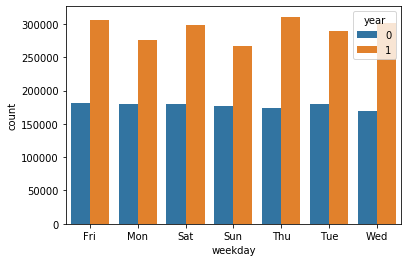

In [22]:
plot('weekday')

### Dummy Variables
The variable `season`,`weathersit`,`weekday`,`mnth` has mutiple levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [23]:
### Creating Dummy Variables:

season = pd.get_dummies(bike['season'], drop_first = True)
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
mnth = pd.get_dummies(bike['mnth'], drop_first = True)
bike = pd.concat([bike,season,mnth,weather,weekday], axis = 1)
bike.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)


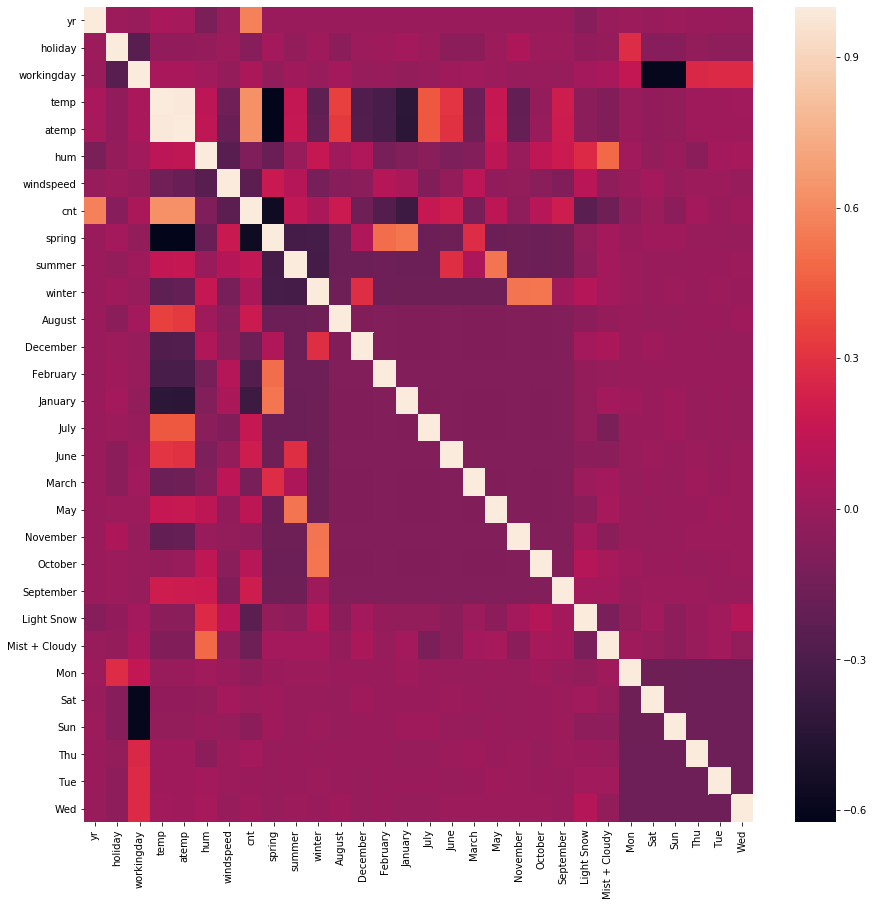

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr())

In [26]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','windspeed','hum','atemp','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


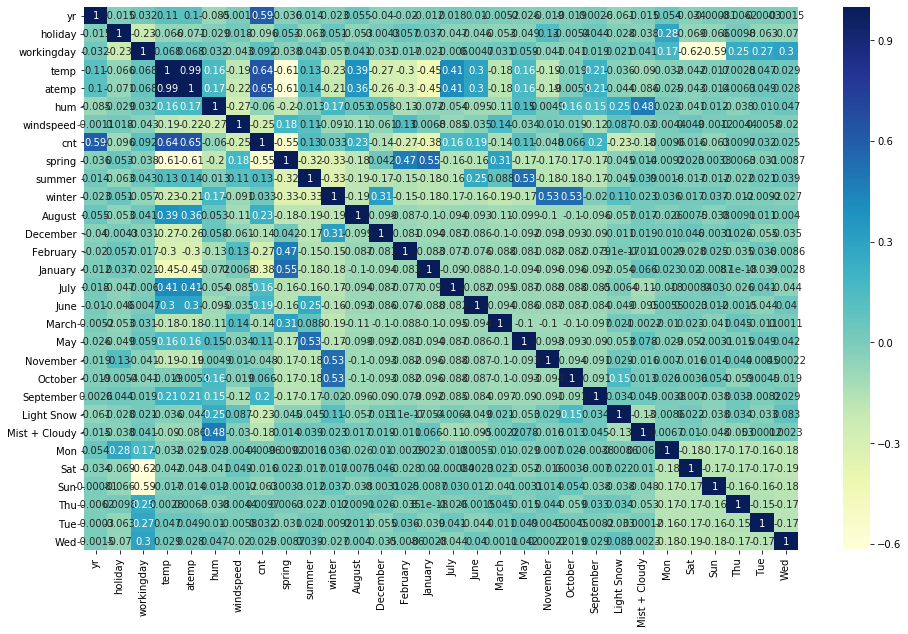

In [29]:
#Lets check Correlation Coefficient
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 5),
 ('December', False, 10),
 ('February', False, 6),
 ('January', False, 15),
 ('July', True, 1),
 ('June', False, 3),
 ('March', False, 4),
 ('May', False, 13),
 ('November', False, 8),
 ('October', False, 2),
 ('September', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 14),
 ('Wed', False, 11)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'September', 'Light Snow', 'Mist + Cloudy',
       'Sat', 'Sun'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'January', 'June', 'March',
       'May', 'November', 'October', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [38]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [39]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model1 = lr.fit()
lr_model1.params
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.13e-191
Time:                        15:19:00   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181      0.000       0.144       0.253
yr                0.2297      0.008     28.660      0.000       0.214       0.245
holiday          -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday        0.0837      0.010      8.672      0.000       0.065       0.103
temp              0.5278      0.033     15.897      0.000       0.463       0.593
hum              -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed        -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring           -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer            0.0526      0.015      3.553      0.000       0.024       0.082
winter            0.1003      0.017      5.890      0.000       0.067       0.134
July             -0.0549      0.018     -3.035      0.003      -0.090      -0.019
September         0.0818      0.016      4.956      0.000       0.049       0.114
Light Snow       -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist + Cloudy    -0.0578      0.010     -5.559      0.000      -0.078      -0.037
Sat               0.0937      0.012      8.045      0.000       0.071       0.117
Sun               0.0405      0.012      3.304      0.001       0.016       0.065
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     9.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
13,Sat,12.20
14,Sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,hum,1.91
12,Mist + Cloudy,1.57


In [41]:
#WorkingDay has high VIF so we will remove it
X_train_rfe = X_train_rfe.drop('workingday', 1)

In [42]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model2 = lr.fit()
lr_model2.params
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.13e-191
Time:                        15:19:14   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2826      0.034      8.286      0.000       0.216       0.350
yr                0.2297      0.008     28.660      0.000       0.214       0.245
holiday          -0.1027      0.025     -4.047      0.000      -0.152      -0.053
temp              0.5278      0.033     15.897      0.000       0.463       0.593
hum              -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed        -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring           -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer            0.0526      0.015      3.553      0.000       0.024       0.082
winter            0.1003      0.017      5.890      0.000       0.067       0.134
July             -0.0549      0.018     -3.035      0.003      -0.090      -0.019
September         0.0818      0.016      4.956      0.000       0.049       0.114
Light Snow       -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist + Cloudy    -0.0578      0.010     -5.559      0.000      -0.078      -0.037
Sat               0.0100      0.011      0.896      0.371      -0.012       0.032
Sun              -0.0432      0.012     -3.744      0.000      -0.066      -0.021
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.37
6,summer,2.78
11,Mist + Cloudy,2.30
0,yr,2.08
8,July,1.59
9,September,1.39


In [44]:
# hum dropped due to high VIF
X_train_rfe = X_train_rfe.drop('hum', 1)

In [45]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model3 = lr.fit()
lr_model3.params
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.73e-189
Time:                        15:19:24   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2039      0.029      6.987      0.000       0.147       0.261
yr                0.2336      0.008     28.839      0.000       0.218       0.250
holiday          -0.1034      0.026     -4.008      0.000      -0.154      -0.053
temp              0.4920      0.033     15.056      0.000       0.428       0.556
windspeed        -0.1491      0.025     -6.032      0.000      -0.198      -0.101
spring           -0.0653      0.021     -3.139      0.002      -0.106      -0.024
summer            0.0465      0.015      3.101      0.002       0.017       0.076
winter            0.0859      0.017      5.058      0.000       0.053       0.119
July             -0.0500      0.018     -2.723      0.007      -0.086      -0.014
September         0.0758      0.017      4.532      0.000       0.043       0.109
Light Snow       -0.2904      0.024    -11.931      0.000      -0.338      -0.243
Mist + Cloudy    -0.0835      0.009     -9.669      0.000      -0.100      -0.067
Sat               0.0117      0.011      1.037      0.300      -0.011       0.034
Sun              -0.0463      0.012     -3.947      0.000      -0.069      -0.023
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,summer,2.23
4,spring,2.13
0,yr,2.07
6,winter,1.84
7,July,1.59
10,Mist + Cloudy,1.55
8,September,1.34
11,Sat,1.23


In [47]:
# Due to High P value will drop Sat
X_train_rfe = X_train_rfe.drop('Sat', 1)

In [48]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model4 = lr.fit()
lr_model4.params
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          6.45e-190
Time:                        15:19:31   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2063      0.029      7.088      0.000       0.149       0.263
yr                0.2334      0.008     28.819      0.000       0.217       0.249
holiday          -0.1057      0.026     -4.114      0.000      -0.156      -0.055
temp              0.4912      0.033     15.034      0.000       0.427       0.555
windspeed        -0.1479      0.025     -5.989      0.000      -0.196      -0.099
spring           -0.0653      0.021     -3.140      0.002      -0.106      -0.024
summer            0.0464      0.015      3.092      0.002       0.017       0.076
winter            0.0861      0.017      5.070      0.000       0.053       0.119
July             -0.0496      0.018     -2.701      0.007      -0.086      -0.014
September         0.0759      0.017      4.536      0.000       0.043       0.109
Light Snow       -0.2904      0.024    -11.928      0.000      -0.338      -0.243
Mist + Cloudy    -0.0835      0.009     -9.670      0.000      -0.101      -0.067
Sun              -0.0485      0.012     -4.207      0.000      -0.071      -0.026
==============================================================================
Omnibus:                       63.147   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.837
Skew:                          -0.632   Prob(JB):                     1.96e-35
Kurtosis:                       5.434   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,yr,2.07
6,winter,1.82
7,July,1.59
10,Mist + Cloudy,1.55
8,September,1.34
11,Sun,1.18


In [50]:
# Dropping July due to P-value and High Coorelation with temp.
X_train_rfe = X_train_rfe.drop('July', 1)

In [51]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model5 = lr.fit()
lr_model5.params
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.51e-189
Time:                        15:19:39   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1983      0.029      6.806      0.000       0.141       0.256
yr                0.2339      0.008     28.714      0.000       0.218       0.250
holiday          -0.1048      0.026     -4.054      0.000      -0.156      -0.054
temp              0.4786      0.033     14.707      0.000       0.415       0.542
windspeed        -0.1481      0.025     -5.958      0.000      -0.197      -0.099
spring           -0.0541      0.021     -2.637      0.009      -0.094      -0.014
summer            0.0612      0.014      4.362      0.000       0.034       0.089
winter            0.0983      0.016      5.967      0.000       0.066       0.131
September         0.0893      0.016      5.558      0.000       0.058       0.121
Light Snow       -0.2913      0.024    -11.892      0.000      -0.339      -0.243
Mist + Cloudy    -0.0822      0.009     -9.474      0.000      -0.099      -0.065
Sun              -0.0496      0.012     -4.282      0.000      -0.072      -0.027
==============================================================================
Omnibus:                       67.435   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.567
Skew:                          -0.684   Prob(JB):                     1.12e-36
Kurtosis:                       5.433   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,yr,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
9,Mist + Cloudy,1.55
7,September,1.23
10,Sun,1.18
8,Light Snow,1.08


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.a

In [53]:
y_train_pred = lr_model5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

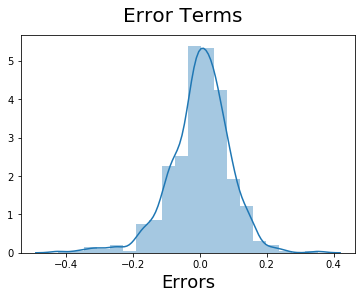

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [55]:
r2_score(y_train, y_train_pred)

0.8390953268163629

In [62]:
lr_model5.params

const            0.198266
yr               0.233911
holiday         -0.104837
temp             0.478564
windspeed       -0.148080
spring          -0.054078
summer           0.061227
winter           0.098268
September        0.089297
Light Snow      -0.291333
Mist + Cloudy   -0.082226
Sun             -0.049628
dtype: float64

### Equation is for the Linear Regression model
y(cnt) = 0.198266 +yr *0.233911 - holiday *0.104837 + temp *0.478564 -windspeed *0.148080 -spring*0.054078 + summer *0.061227 + winter *0.098268 + September *0.089297-Light Snow *0.291333 - Mist + Cloudy*0.082226 -Sun*0.049628

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [56]:
num_vars = ['temp','windspeed','hum','atemp','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [59]:
y_pred= lr_model5.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

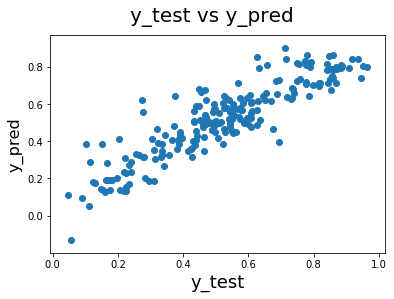

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)           

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.8059746366971767

In [66]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0925


In [79]:
lr_model5.params[:]

const            0.198266
yr               0.233911
holiday         -0.104837
temp             0.478564
windspeed       -0.148080
spring          -0.054078
summer           0.061227
winter           0.098268
September        0.089297
Light Snow      -0.291333
Mist + Cloudy   -0.082226
Sun             -0.049628
dtype: float64

#### Temperature (Temp)
-A coefficient value of `0.478564` indicated that a temperature has significant impact on bike rentals
#### Light Rain & Snow (weathersit =3)
-A coefficient value of `-0.291333` indicated that the light snow and rain deters people from renting out bikes
#### Year (yr)
-A coefficient value of `0.233911` indicated that a year wise the rental numbers are increasing

-It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.

-As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.